# Sistema massa-mola

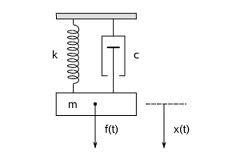


### Input


In [65]:
# System parameters
m_val = 10.0  # mass (kg)
k_val = 20.0  # spring constant (N/m)
c_val = 2.0  # damping coefficient (N·s/m)

# Initial conditions
x0_val = 1.0  # initial displacement (m)
v0_val = 0.0  # initial velocity (m/s)

In [66]:
import numpy as np

p = -c_val / m_val
q = k_val / m_val
delta = (c_val / m_val) ** 2 - 4 * k_val / m_val

print("p value: ", p)
print("q value: ", q)
print("delta value: ", delta)

det_lhs = c_val**2
det_rhs = 4 * m_val * k_val

if c_val == 0 and np.isclose(p, 0) and q > 0:
    print("No damping, center")
elif det_lhs < det_rhs and p < 0 and q > 0 and delta < 0:
    print("Underdamping, stable and attractive spiral")
elif np.isclose(det_lhs, det_rhs) and p < 0 and q > 0 and delta == 0:
    print("Underdamping, stable and attractive point")
elif det_lhs > det_rhs and p < 0 and q > 0 and delta > 0:
    print("Underdamping, stable and attractive")

p value:  -0.2
q value:  2.0
delta value:  -7.96
Underdamping, stable and attractive spiral


Equação diferencial:  Eq(c*Derivative(y(x), x) + k*y(x) + m*Derivative(y(x), (x, 2)), 0)
Solução Geral:  Eq(y(x), C1*exp(x*(-c + sqrt(c**2 - 4*k*m))/(2*m)) + C2*exp(-x*(c + sqrt(c**2 - 4*k*m))/(2*m)))
Solução Particular:  Eq(y(x), (-0.25*c/sqrt(0.25*c**2 - k*m) + 0.5)*exp(-x*(c + sqrt(c**2 - 4*k*m))/(2*m)) + (0.25*c/sqrt(0.25*c**2 - k*m) + 0.5)*exp(x*(-c + sqrt(c**2 - 4*k*m))/(2*m)))


a:\CERNN\Mestrado\metodos-matematicos\.venv\lib\site-packages\matplotlib\cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
a:\CERNN\Mestrado\metodos-matematicos\.venv\lib\site-packages\matplotlib\cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


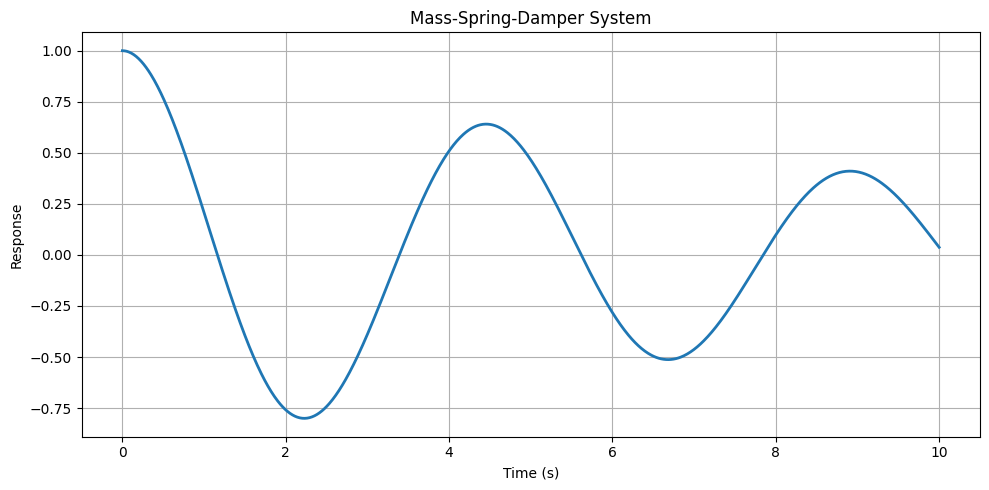

In [70]:
import matplotlib.pyplot as plt
from sympy import lambdify
import numpy as np
from sympy import Function, dsolve, Derivative
from sympy.parsing.latex import parse_latex
from sympy.abc import x
from sympy import Eq, Derivative, Symbol, Function, cos, exp, sin
import math

y = Function("y")
dy = Derivative(y(x), x)
dy2 = Derivative(y(x), x, x)

C1, C2 = Symbol("C1"), Symbol("C2")

m = Symbol("m")
c = Symbol("c")
k = Symbol("k")

p = -c / m
q = k / m
delta = (c / m) ** 2 - 4 * k / m

eq = Eq(m * dy2 + c * dy + k * y(x), 0)
general_solution = dsolve(eq, y(x))
particular_solution = dsolve(
    eq, y(x), ics={y(0): x0_val, Derivative(y(x), x).subs(x, 0): v0_val}
)

print("Equação diferencial: ", eq)
print("Solução Geral: ", general_solution)
print("Solução Particular: ", particular_solution)


current_solution = particular_solution.subs({m: m_val, c: c_val, k: k_val})
displacement = general_solution.subs({m: m_val, c: c_val, k: k_val})

time_solution = np.linspace(0, 10, 1000)
y_func = lambdify(x, current_solution.rhs, modules=["numpy"])
y_vals = y_func(time_solution)

# Plot the result
fig, axs = plt.subplots(1, 1, figsize=(10, 5))

axs.plot(time_solution, y_vals, label="Displacement (x)", linewidth=2)
axs.set_title("Mass-Spring-Damper System")
axs.set_xlabel("Time (s)")
axs.set_ylabel("Response")

# for c1_val in np.linspace(-2, 2, 10):
#     for c2_val in np.linspace(-2, 2, 10):
#         velocity = displacement.rhs.diff(x)
#         phase_func = lambdify(
#             x, velocity.subs({C1: c1_val, C2: c1_val}), modules=["numpy"]
#         )
#         phase_vals = phase_func(time_solution)
#         axs[1].plot(y_vals, phase_vals, linewidth=1, label=f"C1={c1_val}, C2={c2_val}")

# axs[1].set_title("Mass-Spring-Damper System")
# axs[1].set_xlabel("y (Displacement)")
# axs[1].set_ylabel("y_dot (Velocity)")
axs.grid(True)
plt.tight_layout()
plt.show()

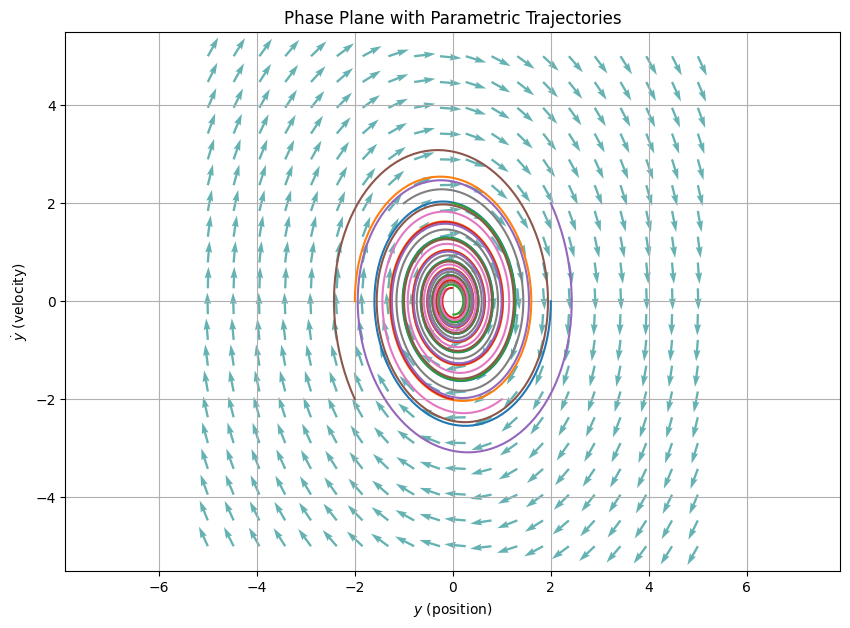

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint


# Define system of first-order ODEs
def derivatives(y, t):
    y1, y2 = y
    dy1dt = y2
    dy2dt = -c_val / m_val * y2 - k_val / m_val * y1
    return [dy1dt, dy2dt]


# Create grid for phase portrait
y1_vals = np.linspace(-5, 5, 20)
y2_vals = np.linspace(-5, 5, 20)
Y1, Y2 = np.meshgrid(y1_vals, y2_vals)

# Evaluate vector field
DY1, DY2 = np.zeros(Y1.shape), np.zeros(Y2.shape)
for i in range(Y1.shape[0]):
    for j in range(Y1.shape[1]):
        dy = derivatives([Y1[i, j], Y2[i, j]], 0)
        DY1[i, j], DY2[i, j] = dy

# Normalize for quiver
M = np.hypot(DY1, DY2)
M[M == 0] = 1.0
DY1 /= M
DY2 /= M

# Plot vector field
plt.figure(figsize=(10, 7))
plt.quiver(Y1, Y2, DY1, DY2, color="teal", alpha=0.6)
plt.xlabel("$y$ (position)")
plt.ylabel("$\dot{y}$ (velocity)")
plt.title("Phase Plane with Parametric Trajectories")

# Time values for integration
t = np.linspace(0, 20, 500)

# Initial conditions to plot parametric solutions
initial_conditions = [
    [2, 0],
    [-2, 0],
    [0, 2],
    [0, -2],
    [2, 2],
    [-2, -2],
    [1, -2],
    [-1, 2],
]

# Solve and plot trajectories
for y0 in initial_conditions:
    sol = odeint(derivatives, y0, t)
    plt.plot(sol[:, 0], sol[:, 1], lw=1.5)

plt.grid(True)
plt.axis("equal")
plt.show()

### Phase plane
